# Ayudantía 3

**Magister en Finanzas**

**Autor:** Gabriel Cabrera G.

**Fecha:** 28 de Agosto del 2019

## Concatenar y *Merge*

1. Construya los tres DataFrames que se encuentran en el apéndice.

In [6]:
import pandas as pd
import numpy as np

raw_data_a = {
        'id': ['1', '2', '3', '4', '5'],
        'nombre': ['Tom', 'Will', 'Tom', 'Jennifer', 'Charlize'], 
        'apellido': ['Cruise', 'Smith', 'Hanks', 'Aniston', 'Theron']}
df_a = pd.DataFrame(raw_data_a, columns = ['id', 'nombre', 'apellido'])
df_a

,id,nombre,apellido
0,1,Tom,Cruise
1,2,Will,Smith
2,3,Tom,Hanks
3,4,Jennifer,Aniston
4,5,Charlize,Theron


In [2]:
raw_data_b = {
        'id': ['4', '5', '6', '7', '8'],
        'nombre': ['Julia', 'Nicole', 'Emma', 'George', 'Al'], 
        'apellido': ['Roberts', 'Kidman', 'Watson', 'Clooney', 'Pacino']}
df_b = pd.DataFrame(raw_data_b, columns = ['id', 'nombre', 'apellido'])
df_b

,id,nombre,apellido
0,4,Julia,Roberts
1,5,Nicole,Kidman
2,6,Emma,Watson
3,7,George,Clooney
4,8,Al,Pacino


In [3]:
raw_data_c = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data_c, columns = ['id','test_id'])
df_n

,id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


2. Utilizando la función `pd.concat()`, concatene los DataFrames `df_a` y `df_b` por columna. Denomine a este nuevo objeto `df_nueva`.

In [4]:
df_nueva = pd.concat([df_a, df_b], axis=0) # .reset_index().drop(columns=['index'])
df_nueva

,id,nombre,apellido
0,1,Tom,Cruise
1,2,Will,Smith
2,3,Tom,Hanks
3,4,Jennifer,Aniston
4,5,Charlize,Theron
0,4,Julia,Roberts
1,5,Nicole,Kidman
2,6,Emma,Watson
3,7,George,Clooney
4,8,Al,Pacino


In [5]:
pd.concat([df_a, df_b], axis=1)

,id,nombre,apellido,id,nombre,apellido
0,1,Tom,Cruise,4,Julia,Roberts
1,2,Will,Smith,5,Nicole,Kidman
2,3,Tom,Hanks,6,Emma,Watson
3,4,Jennifer,Aniston,7,George,Clooney
4,5,Charlize,Theron,8,Al,Pacino


3. Utilizando la función `pd.merge()`, fusione los DataFrames `df_nueva` y `df_n`.

In [6]:
pd.merge(df_nueva, df_n, on='id')

,id,nombre,apellido,test_id
0,1,Tom,Cruise,51
1,2,Will,Smith,15
2,3,Tom,Hanks,15
3,4,Jennifer,Aniston,61
4,4,Julia,Roberts,61
5,5,Charlize,Theron,16
6,5,Nicole,Kidman,16
7,7,George,Clooney,14
8,8,Al,Pacino,15


In [7]:
pd.merge(df_nueva, df_n, left_on='id', right_on='id')

,id,nombre,apellido,test_id
0,1,Tom,Cruise,51
1,2,Will,Smith,15
2,3,Tom,Hanks,15
3,4,Jennifer,Aniston,61
4,4,Julia,Roberts,61
5,5,Charlize,Theron,16
6,5,Nicole,Kidman,16
7,7,George,Clooney,14
8,8,Al,Pacino,15


4. Encuentre:

    a. La intersección entre `df_a` y `df_b`.

In [8]:
pd.merge(df_a, df_b, on='id', how='outer')

,id,nombre_x,apellido_x,nombre_y,apellido_y
0,1,Tom,Cruise,NaN,NaN
1,2,Will,Smith,NaN,NaN
2,3,Tom,Hanks,NaN,NaN
3,4,Jennifer,Aniston,Julia,Roberts
4,5,Charlize,Theron,Nicole,Kidman
5,6,NaN,NaN,Emma,Watson
6,7,NaN,NaN,George,Clooney
7,8,NaN,NaN,Al,Pacino


 b. La union entre`df_a` y `df_b`.

In [9]:
pd.merge(df_a, df_b, on='id', how='inner')

,id,nombre_x,apellido_x,nombre_y,apellido_y
0,4,Jennifer,Aniston,Julia,Roberts
1,5,Charlize,Theron,Nicole,Kidman


5. Fusione los DataFrames `df_a` y `df_b`:

    a. Por la derecha.

In [10]:
pd.merge(df_a, df_b, on='id', how='right')

,id,nombre_x,apellido_x,nombre_y,apellido_y
0,4,Jennifer,Aniston,Julia,Roberts
1,5,Charlize,Theron,Nicole,Kidman
2,6,NaN,NaN,Emma,Watson
3,7,NaN,NaN,George,Clooney
4,8,NaN,NaN,Al,Pacino


    b. Por la izquierda 

In [11]:
pd.merge(df_a, df_b, on='id', how='left')

,id,nombre_x,apellido_x,nombre_y,apellido_y
0,1,Tom,Cruise,NaN,NaN
1,2,Will,Smith,NaN,NaN
2,3,Tom,Hanks,NaN,NaN
3,4,Jennifer,Aniston,Julia,Roberts
4,5,Charlize,Theron,Nicole,Kidman


6. Cambie el nombre de las columnas generadas en (5.b) usando sufijos.

In [12]:
pd.merge(df_a, df_b, on='id', how='left', suffixes=('_left', '_right'))

,id,nombre_left,apellido_left,nombre_right,apellido_right
0,1,Tom,Cruise,NaN,NaN
1,2,Will,Smith,NaN,NaN
2,3,Tom,Hanks,NaN,NaN
3,4,Jennifer,Aniston,Julia,Roberts
4,5,Charlize,Theron,Nicole,Kidman


7. Fusiene los DataFrames `df_a` y `df_b`, a través de los índices (*index*).

In [13]:
pd.merge(df_a, df_b, right_index=True, left_index=True)

,id_x,nombre_x,apellido_x,id_y,nombre_y,apellido_y
0,1,Tom,Cruise,4,Julia,Roberts
1,2,Will,Smith,5,Nicole,Kidman
2,3,Tom,Hanks,6,Emma,Watson
3,4,Jennifer,Aniston,7,George,Clooney
4,5,Charlize,Theron,8,Al,Pacino


# Trabajando con Datos Financieros

1. Utilizando la librería `pandas_datareader`, construya una función que le permita descargar (la fuente debe ser *Yahoo Finance*) los índices accionarios de Microsoft (**MSFT**), Nvidia (**NVDA**), AMD (**AMD**) y Apple (**AAPL**) con frecuencia, diaria desde el 1 de Enero del 2010 hasta hoy. 

In [34]:
import pandas_datareader.data as web
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
from tictoc import tic, toc, toc2
import sys

In [35]:
tickers = ["MSFT", "NVDA", "AMD", "AAPL"]

start_date = dt.datetime(2010, 1, 1)
end_date = dt.datetime.today()

tickers_lista = []

for ticker in range(len(tickers)):
    panel_data = web.DataReader(tickers[ticker], "yahoo", start_date, end_date) 
    panel_data["Symbol"] = tickers[ticker]
    tickers_lista.append(panel_data)

panel_data.head(10)    

,High,Low,Open,Close,Volume,Adj Close,Symbol
Date,,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330,AAPL
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465,AAPL
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330,AAPL
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704,AAPL
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249,AAPL
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,26.195114,AAPL
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,25.897146,AAPL
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,26.262434,AAPL
2010-01-14,30.065714,29.860001,30.015715,29.918571,108223500.0,26.110340,AAPL


In [36]:
stocks_DF = pd.concat(tickers_lista, axis=0) # por filas 
# stocks_DF = pd.read_csv('stocks.csv')
# stocks_DF = stocks_DF.set_index('Date')
stocks_DF = stocks_DF.loc[:,["Close", "Symbol"]]

stocks_DF.head(10)

,Close,Symbol
Date,,
2010-01-04,30.950001,MSFT
2010-01-05,30.959999,MSFT
2010-01-06,30.770000,MSFT
2010-01-07,30.450001,MSFT
2010-01-08,30.660000,MSFT
2010-01-11,30.270000,MSFT
2010-01-12,30.070000,MSFT
2010-01-13,30.350000,MSFT
2010-01-14,30.959999,MSFT


2. Seleccione el precio al cierre (*Close*) y luego construya una función para calcular los retornos de cada índice accionario.
El retorno logarítmico se define como: 

$$
r_t = log(1 + R_t) = log(\frac{P_t}{P_{t-1}}) = p_t - p_{t-1}
$$

In [37]:
def returns_stocks(x):
    stock_cierre = x
    stock_cierre_lag = stock_cierre.shift(1)
    stock_returns = np.log(stock_cierre/stock_cierre_lag) # no va el dropna()
    return stock_returns

stocks_DF['Return'] = stocks_DF.groupby(['Symbol'])['Close'].apply(returns_stocks)
stocks_DF = stocks_DF.dropna()

returns_DF = stocks_DF.loc[:,["Symbol", "Return"]]
returns_DF['Date'] = returns_DF.index

returns_DF.head(10)

,Symbol,Return,Date
Date,,,
2010-01-05,MSFT,0.001727,2010-01-05
2010-01-06,MSFT,-0.016034,2010-01-06
2010-01-07,MSFT,-0.001850,2010-01-07
2010-01-08,MSFT,0.006626,2010-01-08
2010-01-11,MSFT,-0.008861,2010-01-11
2010-01-12,MSFT,-0.011440,2010-01-12
2010-01-13,MSFT,0.014007,2010-01-13
2010-01-14,MSFT,-0.005808,2010-01-14
2010-01-15,MSFT,-0.016853,2010-01-15


3. Utilice la función `pd.pivot()` de manera que cada columna (4) contenga el retorno correspondiente a cada índice accionario. El nombre de las columnas deben corresponder al nombre del nemotécnico del índice.

In [39]:
pivot_DF = returns_DF.pivot(index='Date', columns='Symbol', values='Return')
pivot_DF.head(10)

Symbol,AAPL,AMD,MSFT,NVDA
Date,,,,
2010-01-05,0.014497,0.000323,0.001727,0.001030
2010-01-06,0.006376,-0.006156,-0.016034,-0.014523
2010-01-07,-0.019792,-0.010454,-0.001850,-0.010504
2010-01-08,0.002159,0.006873,0.006626,-0.004233
2010-01-11,-0.014115,-0.012802,-0.008861,-0.031236
2010-01-12,-0.034486,-0.006629,-0.011440,-0.055101
2010-01-13,0.013491,0.009269,0.014007,0.056195
2010-01-14,-0.015757,0.019899,-0.005808,-0.016529
2010-01-15,-0.029939,-0.003235,-0.016853,-0.017938


4. Construya los retornos acumulados y luego gráfique utilizando la librería `matplotlib`. El color de cada serie como las "capas" del gráfico quedan a su elección. 

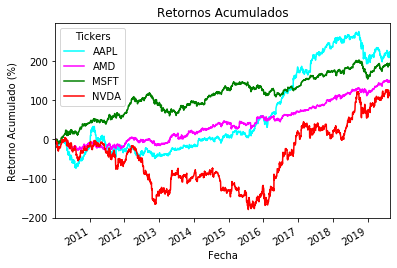

In [40]:
cumsum_returns = pivot_DF.cumsum()*100

# Tools > preferences > IPython console > Graphics > Graphics backend > Backend: Automatic
cumsum_returns.plot(color=['cyan', 'magenta', 'green', 'red'])
plt.title("Retornos Acumulados")
plt.xlabel('Fecha')
plt.ylabel('Retorno Acumulado (%)')
plt.legend(title="Tickers")
plt.show()

# Complejidad computacional

1. Genere una función que entregue la secuencia de **Fibonacci**.
$$
x_n = x_{n-1} + x_{n-2}
$$
La secuencia es una sucesión infinita de números naturales 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, $\infty$. Por ejemplo, si su función la define como `fibonacci`, debería esperarse que `fibonacci(1) = 0`, `fibonacci(2) = 1`, `fibonacci(3) = 1` y así sucesivamente.

In [27]:
def fibo_rec(n):
    if n <= 2:
        return 1 
    return fibo_rec(n-1) + fibo_rec(n-2)

2. Utilizando la función generada en (1), demuestre que la complejidad computacional en términos de tiempo para la secuencia de Fibonacci es $\mathcal{O}(2^n)$.

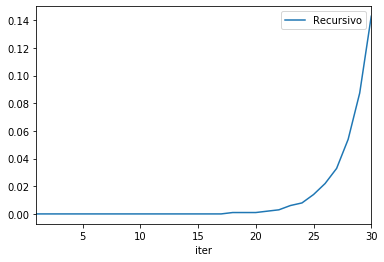

In [28]:
complexA = []

for i in range(1, 31):
    tic()
    fibo_value = fibo_rec(i)
    tiempo_final = toc2()
    iteracion = [i, tiempo_final]
    complexA.append(iteracion)

fibo_recursivo = pd.DataFrame(complexA)
fibo_recursivo.columns = ['iter', 'tiempo']

fibo_recursivo.plot(x="iter", y = "tiempo", kind='line')
plt.legend(['Recursivo'])

plt.savefig('time_complexity.png')

3. Utilizando la función generada en (1), demuestre que la complejidad computacional en términos de espacio para cada $n$ en una iteración es $\mathcal{O}(1)$.

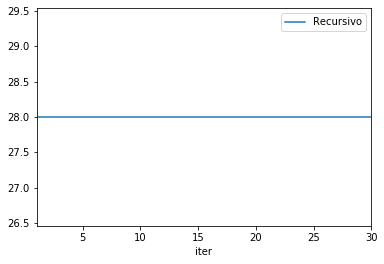

In [30]:
complexB = []
sizeA = []

for i in range(1, 31):
    fibo_value = fibo_rec(i)
    fibo_size = sys.getsizeof(fibo_value) 
    iteracion = [i, fibo_size]
    complexB.append(iteracion)
    
fibo_comlplexity = pd.DataFrame(complexB)
fibo_comlplexity.columns = ['iter', 'size']

fibo_comlplexity.plot(x="iter", y ="size", kind='line')
plt.legend(['Recursivo'])

plt.savefig('space_complexity.png')